In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

datos = pd.read_csv('datos_personas.csv')
datos

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


# Graficando los datos en escala original

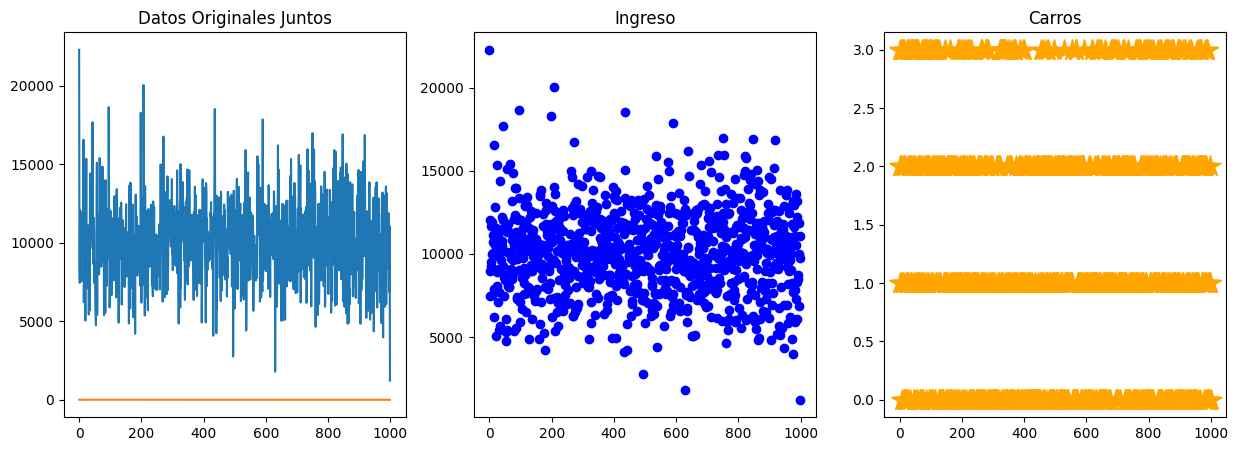

In [2]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title("Datos Originales Juntos")
ax1.plot(datos)

ax2.set_title("Ingreso")
ax2.plot(datos["ingreso"], linewidth=0, marker="o", color="blue", markersize=6)

ax3.set_title("Carros")
ax3.plot(datos["carros"], linewidth=0, marker="*", color="orange", markersize=16)

plt.show()


# Distribución de los datos originales

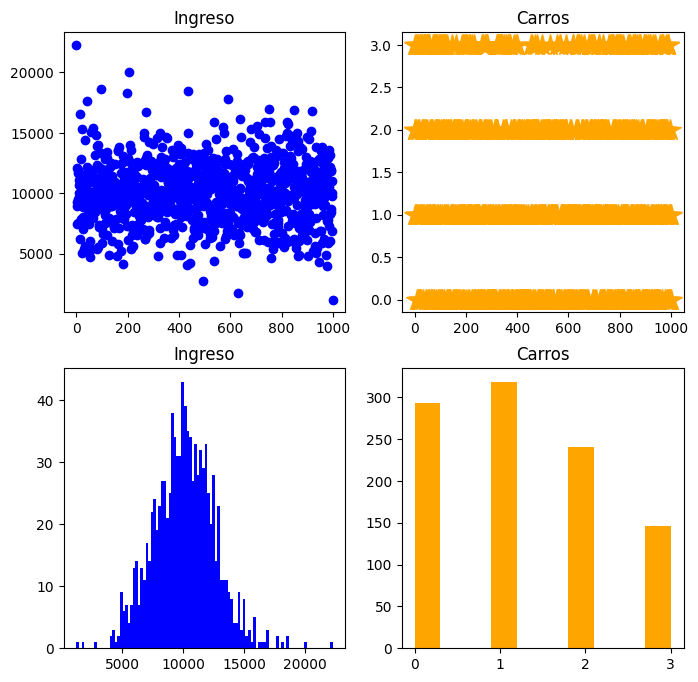

In [3]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_title("Ingreso")
ax1.plot(datos["ingreso"], linewidth=0, marker="o", color="blue", markersize=6)

ax2.set_title("Carros")
ax2.plot(datos["carros"], linewidth=0, marker="*", color="orange", markersize=16)

ax3.set_title("Ingreso")
ax3.hist(datos["ingreso"], bins=100, color="blue")

ax4.set_title("Carros")
ax4.hist(datos["carros"], color="orange")

plt.show()


# Tecnicas para potenciar las caracteristicas de los datos.

In [4]:
# Escala en funcion de minimos y maximos

datos_min_max = preprocessing.MinMaxScaler().fit_transform(datos)
datos_min_max

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

In [5]:
# Normaliza en funcion de la norma del vector

datos_normalizer = preprocessing.Normalizer().transform(datos.T) # Aqui la T es para cambiar de lugar filas por columnas porque el modelo trabaja de esa forma
datos_normalizer = datos_normalizer.T # Aqui volvemos a organizar las filas y columnas de la forma como estaba
# Normalizado = X / raiz_vuadrada(x_1^2 + x_2^2 + ...)
datos_normalizer

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

In [6]:
# Estandariza (desv_std = 1, media = 0)

datos_standard_scaler = preprocessing.StandardScaler().fit_transform(datos)
# Estandarizado = (X - media) / std

datos_robust_scaler = preprocessing.RobustScaler().fit_transform(datos)
# Estandarizado = (X - rango_intercuartilico) / std

datos_standard_scaler, datos_robust_scaler

(array([[ 4.81555174,  1.70892042],
        [-0.4413019 , -0.23193185],
        [-1.04273197,  0.73849429],
        ...,
        [-0.12678303, -0.23193185],
        [ 0.38122719, -0.23193185],
        [-3.49719763, -1.20235798]]),
 array([[ 3.70548334,  1.        ],
        [-0.3376601 ,  0.        ],
        [-0.80023109,  0.5       ],
        ...,
        [-0.09575781,  0.        ],
        [ 0.29496225,  0.        ],
        [-2.68800607, -0.5       ]]))

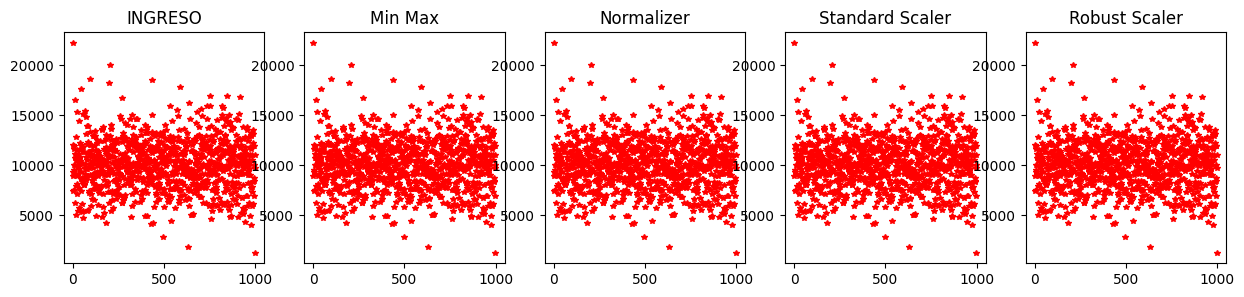

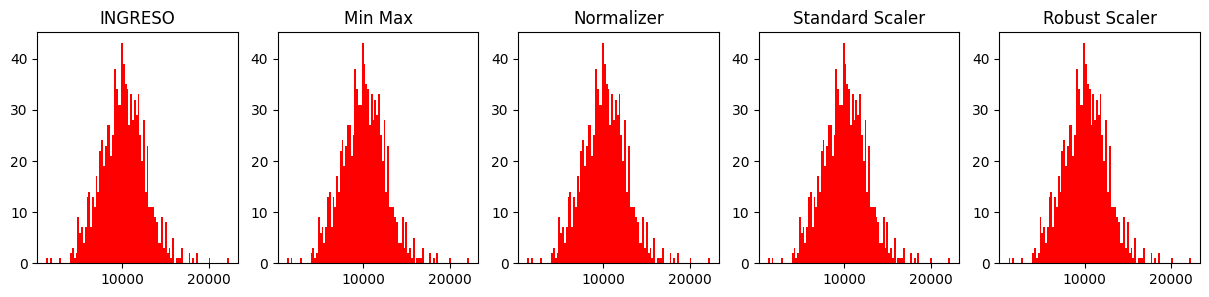

In [7]:
# Convierte vectores de numpy a dataframes de pandas para graficar.
datos_min_max = pd.DataFrame(datos_min_max, columns=['ingreso', 'carros'])
datos_normalizer = pd.DataFrame(datos_normalizer, columns=['ingreso', 'carros'])
datos_standard_scaler = pd.DataFrame(datos_standard_scaler, columns=['ingreso', 'carros'])
datos_robust_scaler = pd.DataFrame(datos_robust_scaler, columns=['ingreso', 'carros'])

# Crea una figura con 5 subfiguras para comparar los datos.
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

#Crea y personaliza series de datos
ax1.set_title('INGRESO')
ax1.plot(datos['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

ax2.set_title('Min Max')
ax2.plot(datos['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

ax3.set_title('Normalizer')
ax3.plot(datos['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

ax4.set_title('Standard Scaler')
ax4.plot(datos['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

ax5.set_title('Robust Scaler')
ax5.plot(datos['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

plt.show()

# Crea una figura con 5 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

#Crea y personaliza series de datos de los histogramas
ax1.set_title('INGRESO')
ax1.hist(datos['ingreso'], color='red', bins=100)

ax2.set_title('Min Max')
ax2.hist(datos['ingreso'], color='red', bins=100)

ax3.set_title('Normalizer')
ax3.hist(datos['ingreso'],  color='red', bins=100)

ax4.set_title('Standard Scaler')
ax4.hist(datos['ingreso'],  color='red', bins=100)

ax5.set_title('Robust Scaler')
ax5.hist(datos['ingreso'], color='red', bins=100)

plt.show()




Podemos ver en el gráfigo anterior que aunque los datos en apariencia no cambiaron su escala si cambio, el objetivo de los modelos palicados es reducir su escala para que esta no influya en los calculos y arroje datos o analisis sesgados por la misma.

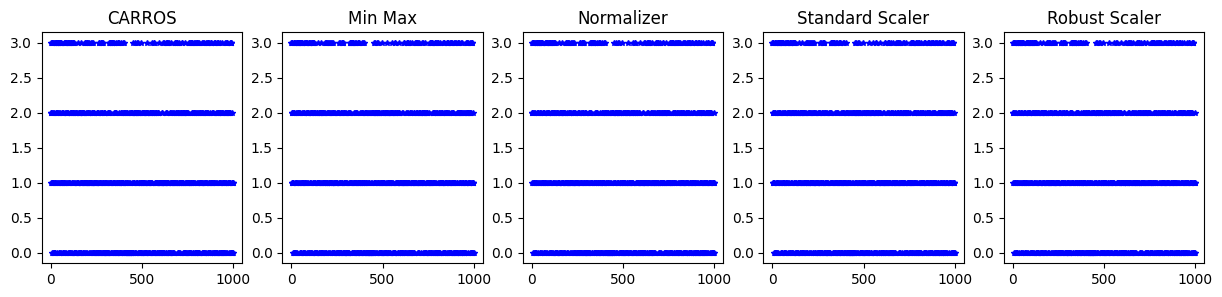

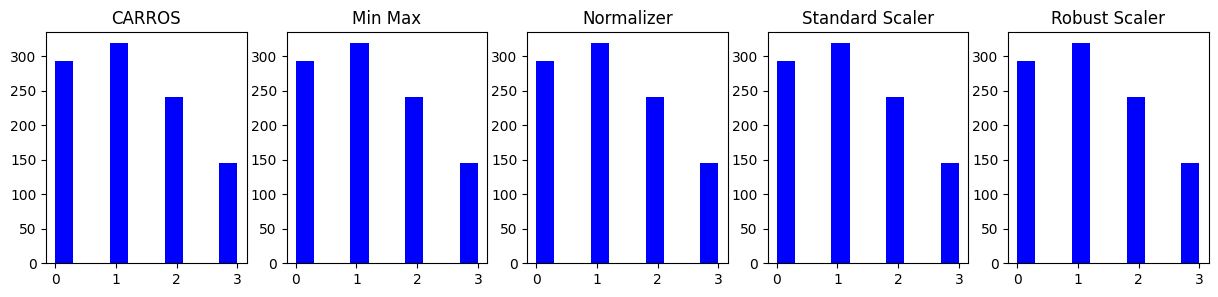

In [9]:
# Crea una figura con 5 subfiguras para comparar los datos.
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

#Crea y personaliza series de datos
ax1.set_title('CARROS')
ax1.plot(datos['carros'], linewidth=0, marker='*', color='blue', markersize=4)

ax2.set_title('Min Max')
ax2.plot(datos['carros'], linewidth=0, marker='*', color='blue', markersize=4)

ax3.set_title('Normalizer')
ax3.plot(datos['carros'], linewidth=0, marker='*', color='blue', markersize=4)

ax4.set_title('Standard Scaler')
ax4.plot(datos['carros'], linewidth=0, marker='*', color='blue', markersize=4)

ax5.set_title('Robust Scaler')
ax5.plot(datos['carros'], linewidth=0, marker='*', color='blue', markersize=4)

plt.show()

# Crea una figura con 5 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

#Crea y personaliza series de datos de los histogramas
ax1.set_title('CARROS')
ax1.hist(datos['carros'], color='blue')

ax2.set_title('Min Max')
ax2.hist(datos['carros'], color='blue')

ax3.set_title('Normalizer')
ax3.hist(datos['carros'], color='blue')

ax4.set_title('Standard Scaler')
ax4.hist(datos['carros'], color='blue')

ax5.set_title('Robust Scaler')
ax5.hist(datos['carros'], color='blue')

plt.show()



El mismo principio ahora aplicado a la columna de los carros.